# Alzheimer

In [1]:
from keras.src.models import Sequential
from keras.src.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.preprocessing import image
import tensorflow as tf
import random

In [2]:
# Verificar se há GPUs disponíveis
gpus = tf.config.list_physical_devices('GPU')

if gpus:
    print(f"GPUs disponíveis: {gpus}")
else:
    print("Nenhuma GPU disponível.")

Nenhuma GPU disponível.


In [3]:
# Configura o seed para garantir reprodutibilidade
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)

In [4]:
# Inicializa a CNN
classfier = Sequential()

# Convolução e pooling
classfier.add(Conv2D(32, (3, 3), input_shape=(256, 124, 1), activation='relu')) 
classfier.add(MaxPooling2D(pool_size=(2, 2)))

classfier.add(Conv2D(64, (3, 3), activation='relu'))
classfier.add(MaxPooling2D(pool_size=(2, 2)))

classfier.add(Conv2D(128, (3, 3), activation='relu'))
classfier.add(MaxPooling2D(pool_size=(2, 2)))

classfier.add(Conv2D(256, (3, 3), activation='relu'))
classfier.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening
classfier.add(Flatten())

# Conexão completa
classfier.add(Dense(units=128, activation='relu'))
classfier.add(Dropout(0.5, seed=seed_value))  # Dropout de 50%
classfier.add(Dense(units=1, activation='sigmoid'))

# Compilando a rede com class_weight
classfier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'Precision', 'Recall'])

In [5]:
# Aumentando dados
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

# Assegurando que a proporção de classes seja considerada
training_set = train_datagen.flow_from_directory(
    'data/mri/train',
    target_size=(256, 124),
    batch_size=32,
    class_mode='binary',
    color_mode='grayscale'
)

test_set = test_datagen.flow_from_directory(
    'data/mri/validation',
    target_size=(256, 124),
    batch_size=32,
    class_mode='binary',
    color_mode='grayscale'
)

Found 18656 images belonging to 2 classes.
Found 3292 images belonging to 2 classes.


In [6]:
# Treinamento da rede
classfier.fit(
    training_set,
    steps_per_epoch=len(training_set),
    epochs=15,
    validation_data=test_set,
    validation_steps=len(test_set)
)

Epoch 1/15
583/583 [==============================] - 159s 272ms/step - loss: 0.4630 - accuracy: 0.7770 - precision: 0.7846 - recall: 0.4829 - val_loss: 0.2487 - val_accuracy: 0.8970 - val_precision: 0.8187 - val_recall: 0.8991
Epoch 2/15
583/583 [==============================] - 172s 295ms/step - loss: 0.2471 - accuracy: 0.8982 - precision: 0.8563 - recall: 0.8452 - val_loss: 0.2621 - val_accuracy: 0.8861 - val_precision: 0.7566 - val_recall: 0.9850
Epoch 3/15
583/583 [==============================] - 190s 327ms/step - loss: 0.1761 - accuracy: 0.9313 - precision: 0.9088 - recall: 0.8891 - val_loss: 0.1587 - val_accuracy: 0.9310 - val_precision: 0.8372 - val_recall: 0.9920
Epoch 4/15
583/583 [==============================] - 189s 324ms/step - loss: 0.1277 - accuracy: 0.9517 - precision: 0.9372 - recall: 0.9208 - val_loss: 0.0937 - val_accuracy: 0.9611 - val_precision: 0.9827 - val_recall: 0.9027
Epoch 5/15
583/583 [==============================] - 177s 303ms/step - loss: 0.1069 - a

In [11]:
# Teste
test_image = image.load_img('data/mri/HC-3051-15313-2588.png', color_mode='grayscale', target_size=(256, 124))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0) / 255.0  # Normalização

result = classfier.predict(test_image)
print(result)

if result[0][0] >= 0.5:
    prediction = 'Not Alzheimer'
else:
    prediction = 'Alzheimer'
print(prediction)

1/1 [==============================] - 0s 43ms/step
[[0.9999996]]
Not Alzheimer


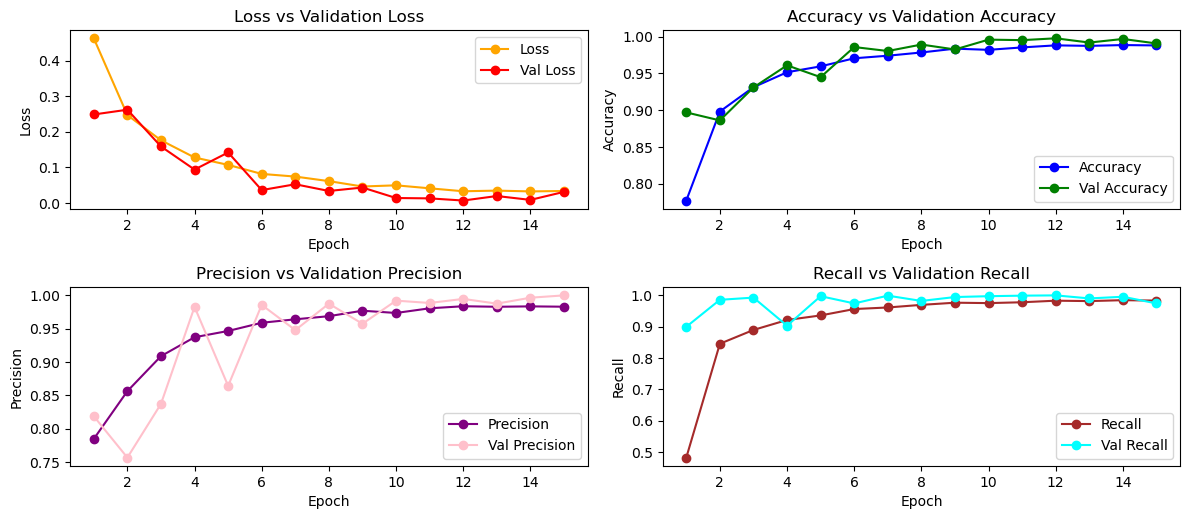

In [15]:
#Gráficos
import matplotlib.pyplot as plt
import pandas as pd

# Dados da tabela
df_five = pd.read_excel('../Resultado 15 epocas dropout.xlsx')

epochs = df_five['Epoch']
loss = df_five['Loss']
accuracy = df_five['Accuracy']
precision = df_five['Precision']
recall = df_five['Recall']

val_loss = df_five['Val Loss']
val_accuracy = df_five['Val Accuracy']
val_precision = df_five['Val Precision']
val_recall = df_five['Val Recall']

# Configurações do gráfico
plt.figure(figsize=(12, 10), facecolor='none')

# Plotando Loss e Val Loss
plt.subplot(4, 2, 1)
plt.plot(epochs, loss, marker='o', label='Loss', color='orange')
plt.plot(epochs, val_loss, marker='o', label='Val Loss', color='red')
plt.title('Loss vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotando Accuracy e Val Accuracy
plt.subplot(4, 2, 2)
plt.plot(epochs, accuracy, marker='o', label='Accuracy', color='blue')
plt.plot(epochs, val_accuracy, marker='o', label='Val Accuracy', color='green')
plt.title('Accuracy vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plotando Precision e Val Precision
plt.subplot(4, 2, 3)
plt.plot(epochs, precision, marker='o', label='Precision', color='purple')
plt.plot(epochs, val_precision, marker='o', label='Val Precision', color='pink')
plt.title('Precision vs Validation Precision')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend()

# Plotando Recall e Val Recall
plt.subplot(4, 2, 4)
plt.plot(epochs, recall, marker='o', label='Recall', color='brown')
plt.plot(epochs, val_recall, marker='o', label='Val Recall', color='cyan')
plt.title('Recall vs Validation Recall')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend()

# Ajustando layout
plt.tight_layout()
plt.show()


In [44]:
df_five.describe()


,Epoch,Loss,Accuracy,Precision,Recall,Val Loss,Val Accuracy,Val Precision,Val Recall
count,5.000000,5.00000,5.000000,5.0000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,3.000000,0.16578,0.930880,0.9105,0.881840,0.114120,0.952860,0.914000,0.958580
std,1.581139,0.12160,0.057728,0.0652,0.115922,0.076442,0.035557,0.078059,0.033601
min,1.000000,0.06370,0.834000,0.8043,0.682500,0.052300,0.894000,0.801100,0.919500
25%,2.000000,0.08770,0.924100,0.8951,0.882200,0.053700,0.948100,0.871400,0.940700
50%,3.000000,0.12260,0.952400,0.9338,0.927100,0.100500,0.962000,0.948300,0.945100
75%,4.000000,0.18850,0.966400,0.9521,0.950000,0.125100,0.979000,0.949200,0.992000
max,5.000000,0.36640,0.977500,0.9672,0.967400,0.239000,0.981200,1.000000,0.995600
